# Import and Feature Selection

New York City Airbnb Dataset is available through Kaggle - save to local data folder:

https://www.kaggle.com/dgomonov/new-york-city-airbnb-open-data

The data is cleaned to focus on listings for tourists.

Cleaning process:
 - Listings with prices under 25 removed
 - Listings must have more than 0 for availability_365
 - Minimum nights should be less than 32
 - Fill null values in reviews_per_month with zeros
 - Must have at least 1 review (no reviews makes it impossible to know how long the listing has been available for)
 - last_review column converted to datetime
 - months listed calculated
 
 
#### Import data and modules

In [76]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor

directory = r'.\data\AB_NYC_2019.csv'

bnb = pd.read_csv(directory)
bnb = bnb[bnb['price'] >= 25] # Listings with price under 25 removed
bnb = bnb[bnb['availability_365'] > 0] # Listings must have availability
bnb = bnb[bnb['minimum_nights'] <= 32] # Short-term stays for tourists
bnb = bnb[bnb['number_of_reviews'] > 0] # At least 1 review
bnb['months'] = bnb['number_of_reviews']/bnb['reviews_per_month'] # Months listed for

print("Number of records: {}\nNumber of features: {}".format(bnb.shape[0],bnb.shape[1]))

Number of records: 25877
Number of features: 17


#### Encode room_type

In [70]:
encode = LabelEncoder()
encode.fit(list(bnb['room_type'].unique()))
bnb['room_type'] = encode.transform(bnb['room_type'])

#### Random Forest Reggressor

Feature space:

 - room_type
 - price
 - minimum_nights
 - calculated_host_listings_count
 - availability_365
 - months
 
Predicting:

 - number_of_reviews

In [72]:
trees = 1000

X_cols = ['room_type','price','minimum_nights','calculated_host_listings_count','availability_365','months']
y_col = 'number_of_reviews'

model_performance = dict()

train_X,test_X,train_y,test_y = train_test_split(bnb[X_cols],bnb[y_col],train_size = 0.8,random_state = 42)

model = RandomForestRegressor(n_estimators = trees, oob_score = True).fit(train_X,train_y)

model_performance['train'] = model.score(train_X,train_y)
model_performance['oob'] = model.oob_score_ 
        
print(model_performance)

{'train': 0.9284571955230057, 'oob': 0.470847252294158}


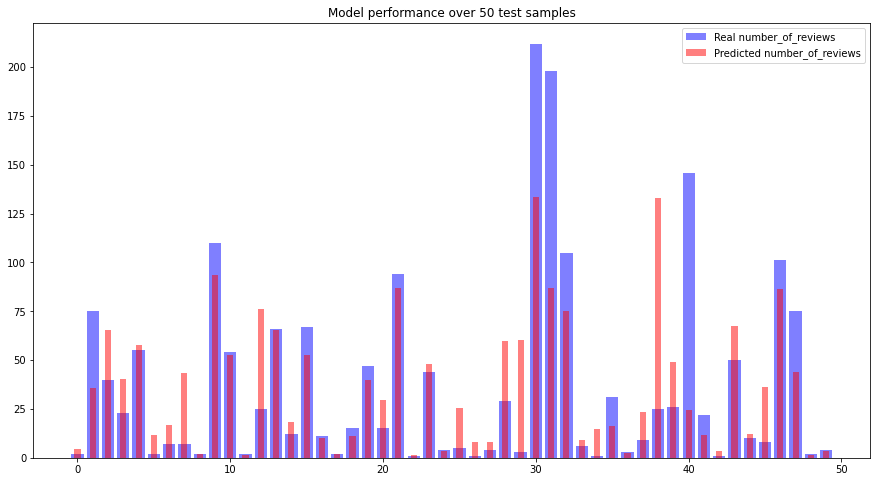

In [74]:
test_df = pd.merge(test_X,test_y,left_index = True,right_index = True).reset_index(drop=True)

sample_size = 50
sample = test_df.sample(sample_size)

predictions = list(model.predict(sample.iloc[:,:-1]))
real = list(sample['number_of_reviews'])

plt.figure(figsize=(15,8))
plt.bar(x = range(sample_size),height = real,color = 'b',alpha = 0.5,label = 'Real number_of_reviews')
plt.bar(x = range(sample_size),height = predictions,width = 0.4,color = 'r',alpha = 0.5, label = 'Predicted number_of_reviews')
plt.title('Model performance over ' + str(sample_size) + ' test samples')
plt.legend()